In [1]:
import tensorflow.keras as keras
import tensorflow as tf
import time
import numpy
import matplotlib.pyplot as plt

In [2]:
def create_model_with_history_for_all_epochs(activation=tf.nn.relu,neuron = 128,layer = 2,optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy',epochs=3,verbose = 1):
    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    x_train = tf.keras.utils.normalize(x_train, axis=1)
    x_test = tf.keras.utils.normalize(x_test, axis=1)
 
    model = tf.keras.models.Sequential()  # a basic feed-forward model
    model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784

    for i in range(0,layer):
        model.add(tf.keras.layers.Dense(neuron, activation=activation))  # a simple fully-connected layer, 128 units, relu activation

    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution
    
    model.compile(optimizer=optimizer,  # Good default optimizer to start with
              loss = loss,  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics= metrics)  # what to track

    print('Trenuję: ')
    val_loss = list()
    val_acc = list()
    loss = list()
    acc = list()
    trains_time = list()

    for i in range(0,epochs):
        start = time.time()

        history = model.fit(x_train,y_train,verbose = verbose)# verbose=0 aby nie wyswietlało 
        
        trains_time.append(time.time() - start)
        
        val_loss_ep, val_acc_ep = model.evaluate(x_test, y_test,verbose = verbose)
        
        val_acc.append(val_acc_ep)
        val_loss.append(val_loss_ep)
        loss.append(history.history['loss'][-1])
        acc.append(history.history[metrics][-1])
        
    return val_loss, val_acc, loss,acc, trains_time, model

In [3]:
val_loss, val_acc,loss,acc, training_time, model = create_model_with_history_for_all_epochs()
model.save('basic_model')

Trenuję: 
313/313 [==============================] - 0s 901us/step - loss: 0.0964 - accuracy: 0.9709
INFO:tensorflow:Assets written to: basic_model\assets


In [6]:
new_model = tf.keras.models.load_model('basic_model')

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

3
8


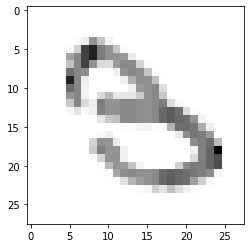

In [8]:
image_index = 18
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = new_model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(y_test[image_index])
print(pred.argmax())